## Observations and Insights

## Dependencies and starter code

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import os

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

#combined_df.to_csv('mousefile.csv')

combined_df.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_statistics_table = combined_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

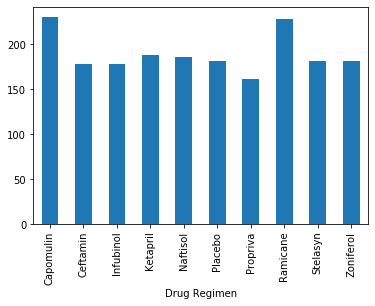

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Finding number of points in each drug regimen
regimen_group = combined_df.groupby('Drug Regimen')
regimen_count = regimen_group['Drug Regimen'].count()
regimen_count

regimen_count.plot.bar(x = 'Drug Regimen', y = regimen_count.count())


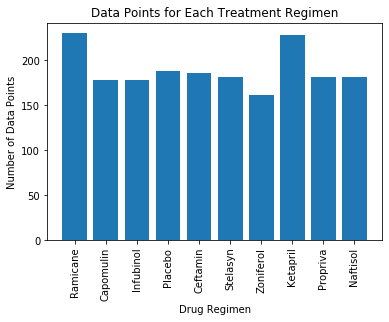

In [47]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x = np.arange(10)
plt.bar(x, regimen_count)

plt.xticks(x,combined_df['Drug Regimen'].unique(), rotation="vertical")
plt.title("Data Points for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()
#plt.bar('Drug Regimen', points)

## Pie plots

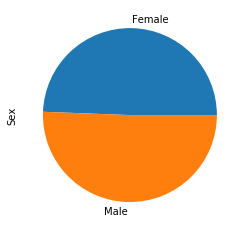

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group = combined_df.groupby('Sex')
gender_count = gender_group['Sex'].count()
gender_count

# F = 935 / M = 958

gender_count.plot.pie(x = 'Sex', y = gender_count)


([<matplotlib.patches.Wedge at 0x178bd959848>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')])

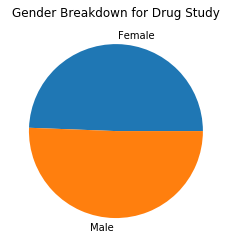

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
plt.title("Gender Breakdown for Drug Study")

plt.pie(gender_count, labels = labels)

## Quartiles, outliers and boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Get only the rows that have the top four promising drugs
drugs = combined_df[combined_df['Drug Regimen'].isin(['Capomulin','Ramicane', 'Infubinol','Ceftamin'])]

# Sort by Timepoint and Mouse ID
last_timepoint_df = drugs.sort_values(by=['Timepoint', 'Mouse ID'])

# Remove all but the last Mouse ID for each mouse
last_timepoint_df = drugs.drop_duplicates('Mouse ID', keep='last')
last_timepoint_df

quartiles = last_timepoint_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
quartiles

print(f"Tumor volume, lower quartile: {lowerq}")
print(f"Tumor volume, upper quartile: {upperq}")
print(f"Tumor volume, interquartile range (IQR): {iqr}")

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
print(f"Tumor volumes below {lower_bound} could be outliers.")
print(f"Tumor volumes above {upper_bound} could be outliers.")

Tumor volume, lower quartile: 37.187743802499995
Tumor volume, upper quartile: 59.930261755000004
Tumor volume, interquartile range (IQR): 22.74251795250001
Tumor volumes below 3.0739668737499812 could be outliers.
Tumor volumes above 94.04403868375002 could be outliers.


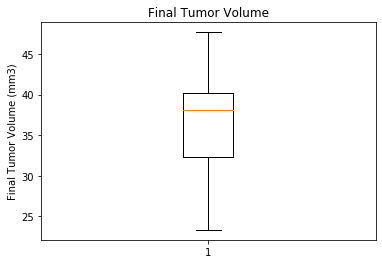

[23.34359787,
 28.48403281,
 28.43096411,
 30.48598484,
 31.02392294,
 31.896238399999998,
 32.37735684,
 33.32909778,
 34.45529799,
 37.31184577,
 36.04104736,
 37.07402422,
 38.84687569,
 38.93963263,
 38.98287774,
 38.75326548,
 38.125164399999996,
 39.95234669,
 40.65812366,
 40.1592203,
 40.72857787,
 41.48300765,
 41.58152074,
 47.68596303,
 46.53920617]

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
capomulin_df = last_timepoint_df.query("`Drug Regimen` == 'Capomulin'")
ax1.boxplot(capomulin_df[['Tumor Volume (mm3)']].iloc[:,0].tolist())
plt.show()
capomulin_df[['Tumor Volume (mm3)']].iloc[:,0].tolist()

# Ramicane


## Line and scatter plots

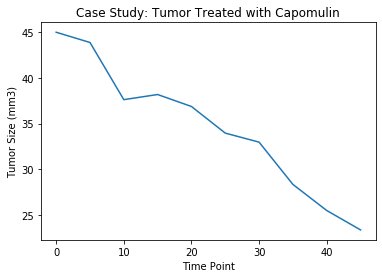

In [55]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
volume_over_time_df = capomulin_df.query("`Mouse ID` == 's185'")
volume_over_time_df

plt.title("Case Study: Tumor Treated with Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Size (mm3)")

plt.plot(volume_over_time_df.iloc[:,5], volume_over_time_df.iloc[:,6])

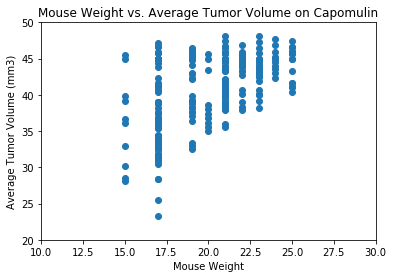

In [66]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_df = combined_df.query("`Drug Regimen` == 'Capomulin'")
plt.scatter(capomulin_df.iloc[:,4], capomulin_df.iloc[:,6])
plt.title("Mouse Weight vs. Average Tumor Volume on Capomulin")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlim(10,30)
plt.ylim(20,50)
plt.show()

The correlation between both factors is 0.53


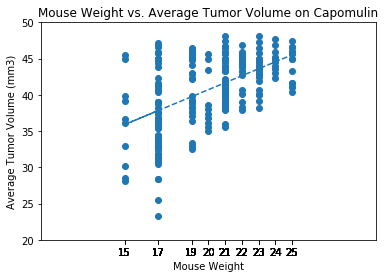

In [85]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Correlation coefficient
mouse_weight = capomulin_df.iloc[:,4]
average_tumor_volume = capomulin_df.iloc[:,6]
correlation = sts.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


# Linear regression
atv_slope, atv_int, atv_r, atv_p, atv_std_err = sts.linregress(capomulin_df.iloc[:,4], capomulin_df.iloc[:,6])

# Create equation of line
atv_fit = atv_slope * capomulin_df.iloc[:,4] + atv_int

# Plot the linear model on scatter plot 
mouse_weight = capomulin_df.iloc[:,4]
average_tumor_volume = capomulin_df.iloc[:,6]
plt.scatter(mouse_weight,average_tumor_volume)
plt.plot(mouse_weight,atv_fit,"--")
plt.xticks(mouse_weight)
plt.title("Mouse Weight vs. Average Tumor Volume on Capomulin")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlim(10,30)
plt.ylim(20,50)
plt.show()